In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
covid = pd.read_csv('covid_pre_proc.csv', index_col='Unnamed: 0')

In [3]:
covid

,localCaso,sexoCaso,dataNascimento,idadeCaso,racaCor,resultadoFinalExame
0,SOBRAL,MASCULINO,14/08/2003,17.0,Parda,Negativo
1,PACAJUS,MASCULINO,07/11/1983,37.0,Parda,Negativo
2,FORTALEZA,MASCULINO,12/03/1992,28.0,Parda,Negativo
3,CAUCAIA,MASCULINO,06/03/1970,50.0,Sem Informacao,Negativo
4,FORTALEZA,FEMININO,10/01/1939,81.0,Parda,Negativo
...,...,...,...,...,...,...
825972,FORTALEZA,MASCULINO,08/08/1990,30.0,Parda,Positivo
825973,FORTALEZA,FEMININO,08/12/1982,37.0,Branca,Positivo
825974,FORTALEZA,FEMININO,02/12/1980,40.0,Parda,Negativo
825975,FORTALEZA,FEMININO,17/05/1988,32.0,Branca,Provável


**Q1:** Média da idade dos indivíduos representados no dataset.

In [4]:
def Q1(dataset):
    return dataset['idadeCaso'].mean()

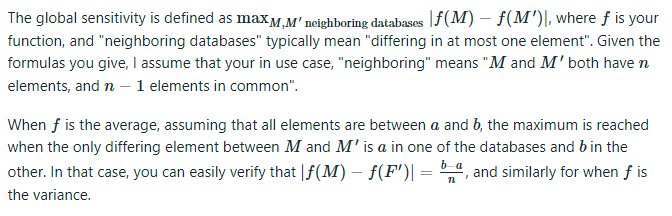

In [5]:
def delta_Q1(dataset):
    # Considering that the oldest person is 120 and the youngest 0, the sensibility is the max difference between two neighboors dataset
    oldest = 120
    youngest = 0
    
    return abs(oldest - youngest)/len(dataset)

**Q2:**  Número de exames positivos (atributo *resultadoFinalExame*).

In [6]:
def Q2(dataset):
    return dataset['resultadoFinalExame'].value_counts()['Positivo']

In [7]:
def delta_Q2(dataset):
    # County query, sensibility=1
    return 1

**Q3:** Total de exames realizados por município (atributo *municipioCaso*).

In [8]:
def Q3(dataset):
    counties = np.unique(dataset['localCaso'])
    n_exams_county = {}
    for county in counties:
        n_exams = sum(dataset['localCaso'][dataset['localCaso'] == county].value_counts())
        n_exams_county[county] = n_exams
    
    return n_exams_county

In [9]:
def delta_Q3(dataset):
    # County query, sensibility=1
    return 1

# Ruído de Laplace

In [10]:
def laplace_query(output, delta, eps):
    if isinstance(output, dict):
        eps = eps/len(output)
        cities = list(output.keys())
        counts = list(output.values())
        print("DELTA: {}, Epsilon = {}".format(delta, eps))
        output_noise = counts + stats.laplace.rvs(loc=0, scale=delta/eps, size=len(output))
        output_noise = output_noise.astype(int)     
        print("DELTA: {}, Epsilon = {}".format(delta, eps))
        
        return dict(zip(cities, output_noise))
    
    elif isinstance(output, np.int64):
        return int(output + stats.laplace.rvs(loc=0, scale=delta/eps))
    
    print("DELTA: {}, Epsilon = {}".format(delta, eps))
    return output + stats.laplace.rvs(loc=0, scale=delta/eps)

In [11]:
epsilon = [0.1, 0.5, 1, 10]
queries = [Q1, Q2, Q3]

In [12]:
all_results = []
for q in queries:
    outputs = {}
    for eps in epsilon:
        sensibilidade = locals()['delta_{}'.format(q.__name__)](covid)
        outputs[eps] = laplace_query(q(covid), sensibilidade, eps)
    all_results.append(outputs)

DELTA: 0.00014528249575956716, Epsilon = 0.1
DELTA: 0.00014528249575956716, Epsilon = 0.5
DELTA: 0.00014528249575956716, Epsilon = 1
DELTA: 0.00014528249575956716, Epsilon = 10
DELTA: 1, Epsilon = 0.0005434782608695652
DELTA: 1, Epsilon = 0.0005434782608695652
DELTA: 1, Epsilon = 0.002717391304347826
DELTA: 1, Epsilon = 0.002717391304347826
DELTA: 1, Epsilon = 0.005434782608695652
DELTA: 1, Epsilon = 0.005434782608695652
DELTA: 1, Epsilon = 0.05434782608695652
DELTA: 1, Epsilon = 0.05434782608695652


In [13]:
all_results

[{0.1: 39.133386196130246,
  0.5: 39.133256076751266,
  1: 39.13320648944114,
  10: 39.13349297293321},
 {0.1: 247398, 0.5: 247400, 1: 247399, 10: 247399},
 {0.1: {'ABAIARA': 805,
   'ACARAPE': 2637,
   'ACARAU': 6243,
   'ACOPIARA': -4098,
   'AIUABA': -3062,
   'ALCANTARAS': -1766,
   'ALTANEIRA': -3663,
   'ALTO SANTO': 2851,
   'AMONTADA': -895,
   'ANTONINA DO NORTE': 4996,
   'APUIARES': 797,
   'AQUIRAZ': 3839,
   'ARACATI': 4631,
   'ARACOIABA': -865,
   'ARARENDA': 1710,
   'ARARIPE': 3695,
   'ARATUBA': 2371,
   'ARNEIROZ': 781,
   'ASSARE': 4739,
   'AURORA': 1560,
   'BAIXIO': -3570,
   'BANABUIU': 1059,
   'BARBALHA': 10106,
   'BARREIRA': 790,
   'BARRO': -332,
   'BARROQUINHA': 1335,
   'BATURITÉ': 3089,
   'BEBERIBE': 3192,
   'BELA CRUZ': 3203,
   'BOA VIAGEM': 4485,
   'BREJO SANTO': 18780,
   'CAMOCIM': 11003,
   'CAMPOS SALES': 7507,
   'CANINDE': 6195,
   'CAPISTRANO': 1406,
   'CARIDADE': -695,
   'CARIRE': -31,
   'CARIRIACU': 4867,
   'CARIUS': -446,
   'CARNAUB

# Plot

In [14]:
all_results[0]

{0.1: 39.133386196130246,
 0.5: 39.133256076751266,
 1: 39.13320648944114,
 10: 39.13349297293321}

In [25]:
all_results[0]['Original'] = Q1(covid)

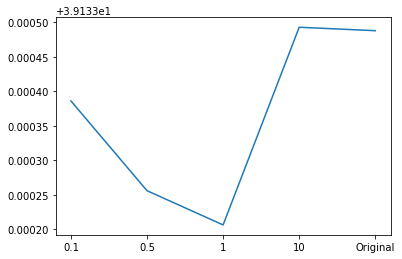

In [26]:
plt.plot(all_results[0].keys(), all_results[0].values())

In [41]:
erros = abs(np.array(list(all_results[0].values())) - np.array(all_results[0]['Original']))

In [ ]:
all_results[0].keys()

In [44]:
erros, all_results[0].keys()

(array([1.01782349e-04, 2.31901728e-04, 2.81489038e-04, 4.99445439e-06,
        0.00000000e+00]),
 dict_keys([0.1, 0.5, 1, 10, 'Original']))

In [ ]:
def plot_graphic(query, dict_dp_results):
    return